In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize as normalizer
#Importing required modules

In [8]:
Data=pd.read_csv('heart.csv')
X=Data.drop('target',axis=1)
y=Data['target']
#Data Loading

In [10]:
len(X)

303

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
#Train test split

In [19]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
49    53    0   0       138   234    0        0      160      0      0.0   
171   48    1   1       110   229    0        1      168      0      1.0   
223   56    0   0       200   288    1        0      133      1      4.0   
58    34    1   3       118   182    0        0      174      0      0.0   
154   39    0   2       138   220    0        1      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
156   47    1   2       130   253    0        1      179      0      0.0   
123   54    0   2       108   267    0        0      167      0      0.0   
15    50    0   2       120   219    0        1      158      0      1.6   
125   34    0   1       118   210    0        1      192      0      0.7   
265   66    1   0       112   212    0        0      132      1      0.1   

     slope  ca  thal  
49       2   0     2  
171      0   0     3  
223      0   2     3  
58       2   0     2  
154      1   0     2  
..     ...  ..   ...  
156      2   0     2  
123      2   0     2  
15       1   0     2  
125      2   0     2  
265      2   1     2  

[212 rows x 13 columns]

In [30]:
X_train=normalizer(X_train,axis=1)
X_test=normalizer(X_test,axis=1)
#Normaliztion

In [38]:
X_train.shape[1]
#Pre vectorized

13

In [59]:
train_data=X_train
test_data=X_test
train_targets=y_train
test_targets=y_test

In [53]:
train_data.shape

(212, 13)

In [57]:
y_train.shape

(212,)

In [66]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [71]:
#K-FOLD CROSS EVALULATION
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    score= model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(score[1])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [76]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
def build_model_new():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['mae'])
    return model

In [77]:
#K-FOLD CROSS VALIDATION-Mean-absolute error.
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model_new()
    history=model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [78]:
all_mae_histories

[[0.4911612868309021,
  0.4868464171886444,
  0.481969952583313,
  0.4783104956150055,
  0.4736490547657013,
  0.4593215882778168,
  0.46114638447761536,
  0.44502270221710205,
  0.43314823508262634,
  0.4293980598449707,
  0.4158092439174652,
  0.4099353849887848,
  0.39840129017829895,
  0.39965200424194336,
  0.38483843207359314,
  0.38147303462028503,
  0.3733220100402832,
  0.36819034814834595,
  0.3726465106010437,
  0.3597961366176605,
  0.35036882758140564,
  0.34714022278785706,
  0.3630138337612152,
  0.3424336314201355,
  0.362100750207901,
  0.3366214334964752,
  0.33652907609939575,
  0.33093762397766113,
  0.33037570118904114,
  0.3340509235858917,
  0.35127153992652893,
  0.3247433304786682,
  0.3198590874671936,
  0.32416483759880066,
  0.3169727325439453,
  0.32495561242103577,
  0.3118349611759186,
  0.31049665808677673,
  0.3124430775642395,
  0.30451053380966187,
  0.3027113080024719,
  0.3017473816871643,
  0.32117143273353577,
  0.30320438742637634,
  0.3011211752

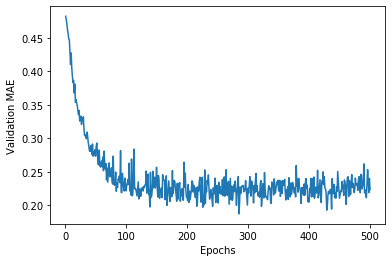

In [80]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()